# Gathering Data

In [1]:
import pandas as pd
import requests
import tweepy
import time
import json
import re
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Given File
twitter_archieve = pd.read_csv('twitter-archive-enhanced.csv')

In [16]:
#Downloading File of image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1],mode = 'wb') as file:
    file.write(response.content)

In [17]:
#Using twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify= True)

In [18]:
#getting twitter id
tweet_ids = list(twitter_archieve['tweet_id'])

In [7]:
tweet_list =[]
error_list = []
with open('tweet_json.txt', 'w') as file:
    t = time.process_time()
    for tweet_id in tweet_ids:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            tweet_list.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            error_list.append(tweet_id)
    elapsed_time = time.process_time()-t
    print(elapsed_time)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
160.25


In [20]:
#Reading Data
image_prediction = pd.read_csv('image-predictions.tsv','\t')
tweet_detail = pd.read_json('tweet_json.txt',lines = True,encoding = 'utf-8')

# Accessing Data

In [175]:
#Accessing Data Visually
twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [176]:
#Accessing Data Visually
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [177]:
#Accessing Data Visually
tweet_detail

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38801,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8584,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33234,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6309,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25023,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4190,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42161,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8707,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40327,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20221,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3137,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11857,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2088,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",65528,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,19032,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27771,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4294,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31941,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [284]:
#list of tweet id which were unavailable in API
error_list

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [285]:
#content which was unaccessible through API
twitter_archieve.loc[twitter_archieve['tweet_id'].isin(error_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None


All the tweets in error_list are retweets

In [286]:
twitter_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [287]:
twitter_archieve.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None
2101,670691627984359425,NaN,NaN,2015-11-28 19:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None
1486,693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,11,10,None,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


In [288]:
twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [330]:
twitter_archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [331]:
#Checking maximum and minimum denominator
twitter_archieve.rating_denominator.max(),twitter_archieve.rating_denominator.min()

(170, 0)

In [332]:
#Checking maximum and minimum numerator
twitter_archieve.rating_numerator.max(),twitter_archieve.rating_numerator.min()

(1776, 0)

In [333]:
#Checking for duplicate data
twitter_archieve[twitter_archieve.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [334]:
#unusual names
twitter_archieve[twitter_archieve['name'].apply(len) < 3]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
583     Bo
649      a
679     Bo
686     Bo
759     an
775      O
801      a
820     Al
852     my
876     Bo
978     Bo
1002     a
1004     a
1017     a
1025    an
1049     a
1193     a
1207     a
1340     a
1351     a
1361     a
1362    an
1368     a
1382     a
1499     a
        ..
2146     a
2153     a
2161     a
2191     a
2198     a
2204    an
2211     a
2218     a
2219    Jo
2222     a
2235     a
2249     a
2255     a
2264     a
2273     a
2287     a
2304     a
2311     a
2314     a
2327     a
2333    an
2334     a
2335    an
2347     a
2348     a
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [335]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [336]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [337]:
#Checking for duplicate data
image_prediction[image_prediction.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [338]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [339]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False
1228,745422732645535745,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,1,Labrador_retriever,0.663800,True,golden_retriever,0.308261,True,ice_bear,0.004269,False


In [340]:
tweet_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [341]:
tweet_detail.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2345.00000,0.0,2.345000e+03,2.345000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2207.0,2207.0,2.600000e+01,2.600000e+01,2345.000000
mean,NaN,NaN,8065.21322,NaN,7.422940e+17,7.422940e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.176271e+17,8.176271e+17,3024.282303
std,NaN,NaN,12134.91703,NaN,6.833642e+16,6.833642e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,5.628443e+16,5.628443e+16,5030.447216
min,NaN,NaN,0.00000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,7.061659e+17,7.061659e+17,0.000000
25%,NaN,NaN,1403.00000,NaN,6.783802e+17,6.783802e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.906447e+17,7.906447e+17,607.000000
50%,NaN,NaN,3534.00000,NaN,7.189392e+17,7.189392e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.331775e+17,8.331775e+17,1412.000000
75%,NaN,NaN,9970.00000,NaN,7.986979e+17,7.986979e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3522.000000
max,NaN,NaN,143365.00000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,77335.000000


In [342]:
tweet_detail.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38801,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8584,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33234,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6309,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25023,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4190,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42161,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8707,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40327,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [343]:
tweet_detail.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1177,NaN,NaN,2016-04-08 15:05:29,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718454723171459074, 'id_str'...",5199,False,This pic is old but I hadn't seen it until tod...,NaN,...,NaN,NaN,NaN,NaN,1639,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
927,NaN,NaN,2016-07-13 18:26:16,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753294480162295809, 'id_str'...",3679,False,This is Ace. He's a window washer. One of the ...,NaN,...,NaN,NaN,NaN,NaN,1155,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1505,NaN,NaN,2016-01-23 18:09:53,"[0, 139]","{'hashtags': [{'text': 'notallpuppers', 'indic...","{'media': [{'id': 690959636103577600, 'id_str'...",3828,False,This golden is happy to refute the soft mouth ...,NaN,...,NaN,NaN,NaN,NaN,1380,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
896,NaN,NaN,2016-07-26 00:58:34,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 757741862451109889, 'id_str'...",7447,False,This is Leonard. He hides in bushes to escape ...,NaN,...,NaN,NaN,NaN,NaN,3601,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1791,NaN,NaN,2015-12-16 02:19:04,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676949624503013376, 'id_str'...",1374,False,This is Tyrus. He's a Speckled Centennial Tico...,NaN,...,NaN,NaN,NaN,NaN,428,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [344]:
#Retweets 
tweet_detail[tweet_detail['retweeted_status'].isnull() == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,18711,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6913,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1309,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6723,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,81,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,14971,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1612,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
99,NaN,NaN,2017-06-08 04:17:07,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,NaN,...,NaN,NaN,NaN,NaN,28,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
107,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5807,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [345]:
#reply tweets
tweet_detail[tweet_detail['in_reply_to_status_id'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,116,False,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,...,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,128,False,@roushfenway These are good dogs but 17/10 is ...,NaN,...,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,313,False,@RealKentMurphy 14/10 confirmed,NaN,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
111,NaN,NaN,2017-06-02 19:38:25,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,120,False,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,...,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
144,NaN,NaN,2017-05-13 16:15:35,"[17, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2311,False,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,...,NaN,NaN,NaN,NaN,101,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
145,NaN,NaN,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863079538779013120, 'id_str'...",8956,False,Ladies and gentlemen... I found Pipsy. He may ...,NaN,...,NaN,NaN,NaN,NaN,1145,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
174,NaN,NaN,2017-04-26 12:48:51,"[10, 28]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,236,False,@Marc_IRL pixelated af 12/10,NaN,...,NaN,NaN,NaN,NaN,20,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
179,NaN,NaN,2017-04-24 15:13:52,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 856526604033556482, 'id_str'...",12202,False,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,...,NaN,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
181,NaN,NaN,2017-04-23 23:26:03,"[28, 165]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,532,False,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,...,NaN,NaN,NaN,NaN,17,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
183,NaN,NaN,2017-04-22 19:15:32,"[14, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,360,False,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,...,NaN,NaN,NaN,NaN,28,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality issues
1. in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id read as float instead of int      
2. retweeted_status_timestamp read as string instead of datatime object   
3. Invalid values of numerator and denomenator
4. Unusual dog names like 'a','an','None'
5. Null values represented as 'None' which will be read as string
6. There are retweets in twitter_archieve
7. There are tweets that don't contain any images
8. id and id_str both read as integer and are different in some observations.
9. It takes first fraction in the text to be the rating_numerator and rating_denominator without looking further
10. Id number 810984652412424192 has no rating and rating_nnumerator and rating_denominator are mistaken to be the first fraction encountered.
11. More descriptive column names can be given
12. Columns with no values at all can be dropped as they only missing data
13. Duplicates

### Tidiness Issues
1. Different stages of dog in 4 variables (doggo,floofer,pupper,puppo) instead of one
2. Irrelevant and similar data spread across 3 tables. We can merge them in single table containing table of our interest

# Clean

In [370]:
# Create copies of original DataFrames to work off of
twitter_archive_clean = twitter_archieve.copy()
image_predictions_clean = image_prediction.copy()
tweet_detail_clean = tweet_detail.copy()
tweet_detail_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [371]:
# Melting stages of dogs to a single column
print(twitter_archive_clean.doggo.value_counts())
print(twitter_archive_clean.floofer.value_counts())
print(twitter_archive_clean.pupper.value_counts())
print(twitter_archive_clean.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [372]:
# Select the columns to melt and to remain
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in twitter_archive_clean.columns.tolist() if x not in columns_to_melt]
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)


In [373]:
print(twitter_archive_clean.dog_stage.value_counts())
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))


None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64
None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64
2356


In [374]:
#Merging tables
twitter_data = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'left', on = ['tweet_id'] )
twitter_data = pd.merge(twitter_data, tweet_detail_clean, how = 'left', on = ['tweet_id'])
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 56 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
dog_stage                        2356 non-null object
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
p1                               2

In [375]:
twitter_data.shape

(2356, 56)

In [376]:
twitter_data.drop(['contributors','coordinates','created_at','display_text_range','entities','extended_entities','favorited','full_text','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink','retweeted','retweeted_status','source_y','truncated','user'],axis = 1,inplace = True)

In [377]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id_x       78 non-null float64
in_reply_to_user_id_x         78 non-null float64
timestamp                     2356 non-null object
source_x                      2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2

In [378]:
#Deleting Retweets
twitter_data = twitter_data[twitter_data.retweeted_status_id.isnull()]
# Delete duplicated tweet_id
twitter_data = twitter_data.drop_duplicates()
# Delete tweets with no pictures
twitter_data = twitter_data.dropna(subset = ['jpg_url'])
# Delete columns related to retweet we don't need anymore
twitter_data = twitter_data.drop('retweeted_status_id', 1)
twitter_data = twitter_data.drop('retweeted_status_user_id', 1)
twitter_data = twitter_data.drop('retweeted_status_timestamp', 1)


In [379]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 24 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1994 non-null object
dog_stage                  1994 non-null object
jpg_url                    1994 non-null object
img_num                    1994 non-null float64
p1                         1994 non-null object
p1_conf                    1994 non-null float64
p1_dog                     1994 non-null object
p2                         1994 non-null object
p2_conf                    1994 non-null float64
p2_dog                     1994

In [380]:
#Getting rid of multiple columns of image prediction
prediction_algorithm = []
confidence_level = []
# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

twitter_data.apply(get_prediction_confidence, axis=1)
twitter_data['prediction_algorithm'] = prediction_algorithm
twitter_data['confidence_level'] = confidence_level
twitter_data = twitter_data.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)



In [381]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1994 non-null object
dog_stage                  1994 non-null object
jpg_url                    1994 non-null object
favorite_count             1994 non-null float64
retweet_count              1994 non-null float64
prediction_algorithm       1994 non-null object
confidence_level           1994 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 202.5+ KB


In [382]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
twitter_data = twitter_data.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x'], 1)

In [383]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 14 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source_x                1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
rating_numerator        1994 non-null int64
rating_denominator      1994 non-null int64
name                    1994 non-null object
dog_stage               1994 non-null object
jpg_url                 1994 non-null object
favorite_count          1994 non-null float64
retweet_count           1994 non-null float64
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 171.4+ KB


In [384]:
#Correcting incorrect/unusual Names
dog_names = []

for text in twitter_data['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('NaN')
twitter_data['dog_name'] = dog_names
print("New column dog_name count \n", twitter_data.dog_name.value_counts())


New column dog_name count 
 NaN          625
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Bella          6
Stanley        6
Bo             6
Toby           6
Koda           6
Jax            6
Louis          5
Leo            5
Chester        5
Rusty          5
Buddy          5
Scout          5
Oscar          5
Milo           5
Bailey         5
Maggie         4
Cassie         4
Clarence       4
Duke           4
            ... 
Lulu           1
Goose          1
Jebberson      1
Scott          1
Vince          1
Snoop          1
Grizzwald      1
Jazzy          1
Callie         1
Superpup       1
Hemry          1
Chelsea        1
Mack           1
Blitz          1
Petrick        1
Devón          1
Noah           1
Rey            1
Buckley        1
Siba           1
Snickers       1
Duddles        1
Moofasa        1
Diogi          1
Creg           1
Ashleigh       1
Rue

In [385]:
twitter_data = twitter_data.drop(['name'], 1)
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 14 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source_x                1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
rating_numerator        1994 non-null int64
rating_denominator      1994 non-null int64
dog_stage               1994 non-null object
jpg_url                 1994 non-null object
favorite_count          1994 non-null float64
retweet_count           1994 non-null float64
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
dog_name                1994 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 171.4+ KB


In [386]:
#Dealing with null values marked as none
twitter_data.loc[twitter_data['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
twitter_data.loc[twitter_data['dog_name'] == 'NaN', 'dog_name'] = None
twitter_data.rating_numerator = twitter_data.rating_numerator.fillna(0)
twitter_data.rating_denominator = twitter_data.rating_denominator.fillna(0)

In [387]:
#Standardising numerator and denomenator
twitter_data.loc[twitter_data.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
106,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,2
255,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,44,40
348,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50
384,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,130
385,684222868335505415,Someone help the girl is being mugged. Several...,121,110
464,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
497,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
534,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
545,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
639,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90


In [388]:

twitter_data.loc[twitter_data.tweet_id== 740373189193256964,['rating_numerator','rating_denominator']]=[14,10]
twitter_data.loc[twitter_data.tweet_id== 722974582966214656,['rating_numerator','rating_denominator']]=[13,10]
twitter_data.loc[twitter_data.tweet_id== 716439118184652801,['rating_numerator','rating_denominator']]=[11,10]
twitter_data.loc[twitter_data.tweet_id== 682962037429899265,['rating_numerator','rating_denominator']]=[10,10]
twitter_data.loc[twitter_data.tweet_id== 666287406224695296,['rating_numerator','rating_denominator']]=[9,10]


twitter_data['rating']=twitter_data.rating_numerator/twitter_data.rating_denominator
twitter_data=twitter_data.drop(['rating_numerator','rating_denominator'],axis=1)
twitter_data.loc[twitter_data.tweet_id == 810984652412424192,'rating' ] = 0

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 13 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source_x                1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
dog_stage               1994 non-null object
jpg_url                 1994 non-null object
favorite_count          1994 non-null float64
retweet_count           1994 non-null float64
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
dog_name                1369 non-null object
rating                  1994 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 155.8+ KB


In [389]:
twitter_data.describe()

,tweet_id,favorite_count,retweet_count,confidence_level,rating
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,8847.874624,2716.228185,0.464991,1.168806
std,6.747816e+16,12562.924047,4689.912390,0.339470,4.066739
min,6.660209e+17,80.000000,13.000000,0.000000,0.000000
25%,6.758475e+17,1925.000000,607.000000,0.140466,1.000000
50%,7.084748e+17,4045.500000,1312.000000,0.459130,1.100000
75%,7.877873e+17,11142.500000,3121.750000,0.776387,1.200000
max,8.924206e+17,143365.000000,77335.000000,0.999956,177.600000


In [390]:
twitter_data.dtypes

tweet_id                  int64
timestamp                object
source_x                 object
text                     object
expanded_urls            object
dog_stage                object
jpg_url                  object
favorite_count          float64
retweet_count           float64
prediction_algorithm     object
confidence_level        float64
dog_name                 object
rating                  float64
dtype: object

In [392]:
#Converting each to its proper data type
twitter_data['timestamp'] = pd.to_datetime(twitter_data.timestamp)
twitter_data['source_x'] = twitter_data['source_x'].astype('category')
twitter_data['dog_stage'] = twitter_data['dog_stage'].astype('category')
twitter_data['favorite_count'] = twitter_data['favorite_count'].astype(int)
twitter_data['retweet_count'] = twitter_data['retweet_count'].astype(int)
twitter_data.dtypes

tweet_id                         int64
timestamp               datetime64[ns]
source_x                      category
text                            object
expanded_urls                   object
dog_stage                     category
jpg_url                         object
favorite_count                   int32
retweet_count                    int32
prediction_algorithm            object
confidence_level               float64
dog_name                        object
rating                         float64
dtype: object

In [393]:
#Renaming Columns to relatable names
twitter_data = twitter_data.rename(columns = {'timestamp': 'tweet_date', 'source_x': 'tweet_source', 
                                        'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture_predicted', 
                                        'prediction_algorithm' : 'dog_breed','rating':'dog_rating'})

In [394]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 13 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null datetime64[ns]
tweet_source               1994 non-null category
text                       1994 non-null object
tweet_url                  1994 non-null object
dog_stage                  1994 non-null category
tweet_picture_predicted    1994 non-null object
favorite_count             1994 non-null int32
retweet_count              1994 non-null int32
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_rating                 1994 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 136.5+ KB


In [398]:
twitter_data.describe()

,tweet_id,favorite_count,retweet_count,confidence_level,dog_rating
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,8847.874624,2716.228185,0.464991,1.168806
std,6.747816e+16,12562.924047,4689.912390,0.339470,4.066739
min,6.660209e+17,80.000000,13.000000,0.000000,0.000000
25%,6.758475e+17,1925.000000,607.000000,0.140466,1.000000
50%,7.084748e+17,4045.500000,1312.000000,0.459130,1.100000
75%,7.877873e+17,11142.500000,3121.750000,0.776387,1.200000
max,8.924206e+17,143365.000000,77335.000000,0.999956,177.600000


In [399]:
twitter_data.head()

,tweet_id,tweet_date,tweet_source,text,tweet_url,dog_stage,tweet_picture_predicted,favorite_count,retweet_count,dog_breed,confidence_level,dog_name,dog_rating
2,667549055577362432,2015-11-20 03:44:31,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,5973,2393,None,0.000000,None,0.1
3,667546741521195010,2015-11-20 03:35:20,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,342,132,toy_poodle,0.787424,None,0.9
4,667544320556335104,2015-11-20 03:25:43,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,892,548,Pomeranian,0.412893,Kial,1.0
5,667538891197542400,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,209,70,Yorkshire_terrier,0.618957,Klint,0.9
6,667724302356258817,2015-11-20 15:20:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,None,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,502,332,None,0.000000,None,0.7


# Storing, Analyzing and Visualizing

In [400]:
twitter_data.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [402]:
tweet_data = pd.read_csv('twitter_archive_master.csv')
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
text                       1994 non-null object
tweet_url                  1994 non-null object
dog_stage                  1994 non-null object
tweet_picture_predicted    1994 non-null object
favorite_count             1994 non-null int64
retweet_count              1994 non-null int64
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_rating                 1994 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 140.2+ KB


In [415]:
tweet_data.loc[:,['retweet_count','favorite_count']].max()


retweet_count      77335
favorite_count    143365
dtype: int64

### Insight 1
Maximum number of retweet count is 77335.
Maximum number of favorite count is 143365.

In [425]:
tweet_data[tweet_data['retweet_count']==77335][['dog_breed','dog_rating','dog_stage']]


,dog_breed,dog_rating,dog_stage
1743,Labrador_retriever,1.3,doggo


### Insight 2 
The dog that has maximum retweet count is a labrador retriever doggo with rating of 1.3

In [426]:
tweet_data[tweet_data['favorite_count']==143365][['dog_breed','dog_rating','dog_stage']]

,dog_breed,dog_rating,dog_stage
1983,Lakeland_terrier,1.3,puppo


### Insight 3 
The dog that has maximum favorite count is lakeland terrier puppo with rating of 1.3

In [431]:
tweet_data.dog_rating.value_counts()

1.2      454
1.0      421
1.1      403
1.3      262
0.9      152
0.8       95
0.7       51
1.4       36
0.5       33
0.6       32
0.3       19
0.4       15
0.2        9
0.1        4
0.0        3
177.6      1
2.6        1
7.5        1
42.0       1
2.7        1
Name: dog_rating, dtype: int64

### Insight 4
Most number of dogs have rating of 1.2

In [427]:
tweet_data[tweet_data['dog_rating'] <= 1.4]['dog_rating'].describe()

count    1989.000000
mean        1.054902
std         0.219205
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: dog_rating, dtype: float64

### Insight 5
Dogs in the given dataset have average rating of 1.05. 
Insight 4 is also shown here.

## Visualisation 1

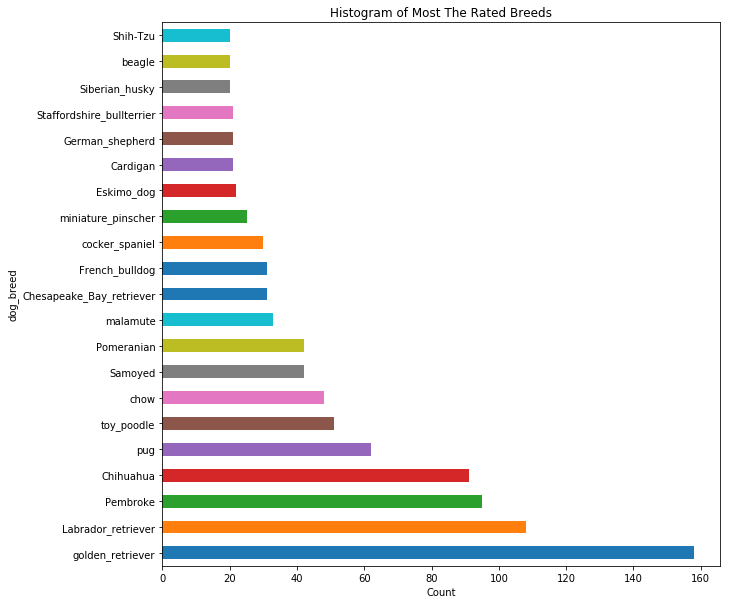

In [443]:
df_by_breed = tweet_data.groupby('dog_breed').filter(lambda x: len(x) >= 20)
df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

### Insight 6
Golden retriever is rated maximum number of times. This also means that it is owned by most people in given dataset.
Followed by Labrador retriever and then pembroke.

## Visualisation 2

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

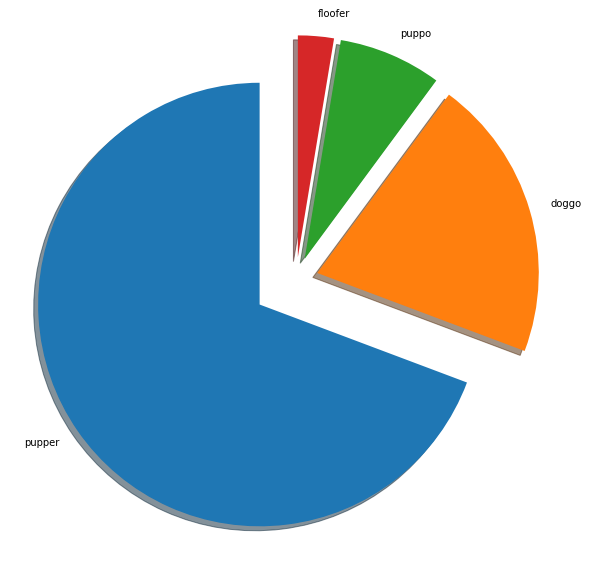

In [444]:
dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


### Insight 7
The data has most number of dogs as puppers and least number as floofers.(Dog Stages)

## Visualisation 3

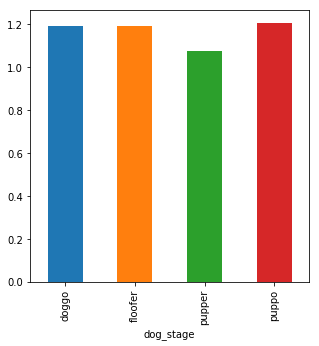

In [460]:
mean_rating = tweet_data[tweet_data['dog_stage'] != 'None'].groupby('dog_stage')['dog_rating'].mean()
mean_rating.plot(kind = 'bar',figsize = (5,5))

In [461]:
tweet_data[tweet_data['dog_stage'] != 'None'].groupby('dog_stage')['dog_rating'].mean()

dog_stage
doggo      1.188889
floofer    1.187500
pupper     1.072642
puppo      1.204348
Name: dog_rating, dtype: float64

### Insight 8
Although puppers form largest number of dogs in that stage, they has least mean rating.